In [16]:
from collections import defaultdict
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import json
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to C:\Users\Karan
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Karan
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
def read_yelp_dataset(file_path):
    mo_business = []
    for chunk in pd.read_json(file_path, lines=True, chunksize=10000):
        filtered_chunk = chunk[chunk['state'].isin(['mo', 'MO', 'Mo', 'mO'])]
        chunk_json = filtered_chunk.to_dict(orient="records")
        mo_business.extend(chunk_json)
    return mo_business

def write_json(file_name, ext, contents):
    try:
        with open(file_name + "."+ ext, 'w') as f:
            json.dump(contents, f, indent=4)
        print(f"Successfully written to {file_name}.{ext}")
    except Exception as e:
        print("Error: ", e)
        raise
        
def write_csv(df, csv_name):
    df.to_csv(csv_name + '.csv',index=False)

# Sampling for Montreal

In [18]:
file_path = "../data/raw/business.json" 
mo_business = read_yelp_dataset(file_path)

print(f"Successfully loaded {len(mo_business)} entries from the Business dataset.")

if mo_business:
    print("\nFirst entry in the dataset:")
    print(json.dumps(mo_business[0], indent=2))

Successfully loaded 10913 entries from the Business dataset.

First entry in the dataset:
{
  "business_id": "mpf3x-BjTdTEA3yCZrAYPw",
  "name": "The UPS Store",
  "address": "87 Grasso Plaza Shopping Center",
  "city": "Affton",
  "state": "MO",
  "postal_code": "63123",
  "latitude": 38.551126,
  "longitude": -90.335695,
  "stars": 3.0,
  "review_count": 15,
  "is_open": 1,
  "attributes": {
    "BusinessAcceptsCreditCards": "True"
  },
  "categories": "Shipping Centers, Local Services, Notaries, Mailbox Centers, Printing Services",
  "hours": {
    "Monday": "0:0-0:0",
    "Tuesday": "8:0-18:30",
    "Wednesday": "8:0-18:30",
    "Thursday": "8:0-18:30",
    "Friday": "8:0-18:30",
    "Saturday": "8:0-14:0"
  }
}


In [6]:
write_json("mo_business", "json", mo_business)

Successfully written to mo_busi.json


In [19]:
mo_business_ids = set()

for row in mo_business:        
    if row['business_id']:
        mo_business_ids.add(row['business_id'])

In [20]:
len(mo_business_ids)

10913

In [22]:
mo_business_ids

{'_Xe-dBjtCD3rmC7tbk08dQ',
 'oAsQSIYjp56Z6woPunfLxw',
 'UU503tMXdZR4oDZXuoKuGA',
 'EvgRJ-09uavss9YNgnAq7A',
 '6u51kembCosi-fLsPwUbCA',
 'u5_9rsVeGl7imoYB6I2ahw',
 'uasMzMp00F9azoVpqq-xOw',
 'VxY4CW0ijTBTlDvNhGUffw',
 'S2t65PFkp4tUM36jUH0pZA',
 'BOjpe0u5u_cm9SWMS2KLFg',
 'mUSuT-LtuGUjqmijPIozGg',
 'hRL0ckObJEJOJ2irlOAXDQ',
 'IslZvM5WfAw-iWBvaXWbNA',
 'uTAAG6zfdoApH7-1ryCxqQ',
 'KzCRmb7dpEk7FUTHyynanQ',
 'HGR-bEHTZak4bCVmIR-aKQ',
 'WY0ji9m-qAOc_6lK8h4pNw',
 'XTc_ZwG9zt7L_dmwZahGOQ',
 'HFLQ1jmfyfICzk95skEDDw',
 '068DMaEKghlGsSzJPuLucA',
 'AAUZbyoJDezAh53xQP3Tbg',
 'f_N7S_M86uHnfgBL0EPU3Q',
 '-NF_wBObzf5IdLzWyea7XA',
 'TNtcjnta11CpDebuBNdoug',
 'm6Q6z3SAkXVdidNqiKmBrQ',
 'MDe5ehdhf6YkEw1sLmeWDw',
 'kDJ7OtOx4VLUoN4v1m8ikA',
 'w_PuO0-yKhdLTMkNesX1dQ',
 'ShG57pFFwmHGpNK42NmUUg',
 'VKyfcuU-qa8IPhKQJvoNyA',
 '9fajAXTAT1A_pcGakz64hA',
 '_geBSCsu-QEoO64rpEZYiA',
 'yQrXytT_zKbex3-CmDz6vA',
 '_0ki9SYy99XWYWT2quHPNA',
 '4LPR7oVxoT0gWi8_c2zDgA',
 'vqupAQF3TJCO25nC7f2E6Q',
 'wt-nZcKEihRl6liR0P1ALw',
 

In [10]:
chunk_size = 10000

mo_business_reviews = []

for chunk in pd.read_json("../data/raw/review.json", lines=True, chunksize=chunk_size):
    filtered_chunk = chunk[chunk['business_id'].isin(mo_business_ids)]
    chunk_json = filtered_chunk.to_dict(orient="records")
    mo_business_reviews.extend(chunk_json)

In [11]:
len(mo_business_reviews)

502385

In [13]:
mo_business_reviews[4]

{'review_id': '-up4mW6WdqzGrRh7t_pLmA',
 'user_id': 'xbybLiQockAzC4xAlzFrGg',
 'business_id': 'EpREWeEpmR8f1qLHzzF0AA',
 'stars': 5,
 'useful': 0,
 'funny': 0,
 'cool': 0,
 'text': "After living in the STL area for way over 10 years now, I am both ashamed and remorseful to admit that I ate here for the FIRST time just a few weeks ago. I am ashamed because it's a St. Louis tradition and remorseful because I missed out on it for so..many...years! \n\nThis place is amazing. What is not to love! It's a factory where you can get a tour (Friday-Sunday, noon-5pm on the hour), there's a shop, bar, and dining area. They also host many event with live music on the weekends. It's fun to just kind of wander and look around - don't worry, you'll get a chance because there will likely be a wait before you dine. The beer is, of course, amazing. The Hefeweizen is my personal favorite and a great start for anyone who is not a huge beer drinker (like myself). Additionally, the food is homegrown and damn

In [20]:
business_review_freq = defaultdict(int)

for review in mo_business_reviews:
    if review["business_id"]:
        business_review_freq[review["business_id"]] += 1

print(sorted(business_review_freq.items(), key=lambda l:-l[1])[:5])

[('I_3LMZ_1m2mzR0oLIOePIg', 4093), ('iRIHK8-EwpeffwvoO4nzIA', 2170), ('2BMk_drsikKWslJCXmQtjQ', 2023), ('R8t9g5nvi7VFyS8zsgmj8Q', 1788), ('cQIh4YJlVtZI9TLF5_smOg', 1781)]


In [24]:
mo_business[0]

{'business_id': 'mpf3x-BjTdTEA3yCZrAYPw',
 'name': 'The UPS Store',
 'address': '87 Grasso Plaza Shopping Center',
 'city': 'Affton',
 'state': 'MO',
 'postal_code': '63123',
 'latitude': 38.551126,
 'longitude': -90.335695,
 'stars': 3.0,
 'review_count': 15,
 'is_open': 1,
 'attributes': {'BusinessAcceptsCreditCards': 'True'},
 'categories': 'Shipping Centers, Local Services, Notaries, Mailbox Centers, Printing Services',
 'hours': {'Monday': '0:0-0:0',
  'Tuesday': '8:0-18:30',
  'Wednesday': '8:0-18:30',
  'Thursday': '8:0-18:30',
  'Friday': '8:0-18:30',
  'Saturday': '8:0-14:0'}}

In [25]:
mo_business_reviews[0]

{'review_id': 'XW_LfMv0fV21l9c6xQd_lw',
 'user_id': '9OAtfnWag-ajVxRbUTGIyg',
 'business_id': 'lj-E32x9_FA7GmUrBGBEWg',
 'stars': 4,
 'useful': 0,
 'funny': 0,
 'cool': 0,
 'text': "Love going here for happy hour or dinner!  Great patio with fans to beat the StL heat!   Also...very accomodating at this location.  I like the Veal Milanese but with mixed greens instead of pasta!  they'll modify the menu to suit your taste!",
 'date': Timestamp('2014-06-27 22:44:01')}

In [29]:
mo_business_reviews_df = pd.DataFrame(mo_business_reviews)

In [30]:
mo_business_reviews_df['date'] = mo_business_reviews_df['date'].astype(str)

In [33]:
mo_business_reviews_df.to_csv('mo_business_reviews.csv',index=False)

In [43]:
mo_business_reviews_df.to_json('mo_business_reviews.json', orient="records", indent=4)

# Tokenization and Stemming

In [12]:
reviews = pd.read_csv('../data/mo_business_reviews.csv')
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,Love going here for happy hour or dinner! Gre...,2014-06-27 22:44:01
1,LnGZB0fjfgeVDVz5IHuEVA,j2wlzrntrbKwyOcOiB3l3w,rBdG_23USc7DletfZ11xGA,4,1,0,0,The hubby and I have been here on multiple occ...,2014-08-10 19:41:43
2,vBK79c3_1Ff_oqkh5VpfGg,Ohhrhu1RkqfVciIVx_W5HQ,nRKndeZLQ3eDL10UMwS2rQ,5,2,5,2,HOLY SMOKES!\n\nactual pumpkin pie mixed in wi...,2009-10-13 19:49:51
3,yCbzm_d4cHpfUX00Ljvgmg,bHSoye7R5cL-LVWLxtaxMg,SSZDGl2J-CEyIzuIbEiYNQ,2,2,0,0,"We started with the artichoke dip, big mistake...",2017-09-08 23:20:19
4,-up4mW6WdqzGrRh7t_pLmA,xbybLiQockAzC4xAlzFrGg,EpREWeEpmR8f1qLHzzF0AA,5,0,0,0,After living in the STL area for way over 10 y...,2011-11-30 06:58:36


In [13]:
b1 = np.random.choice(reviews.business_id)
b2 = np.random.choice(reviews.business_id)

In [14]:
b1_reviews = reviews[reviews['business_id'] == b1]
b1_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
305707,RDzdAIQKFqDWkev_sgIQpA,wCKJ1xBUqqY87BmAXlRn5A,A8XLqpOuZzcwfPtrmS97SQ,4,0,0,0,This is a very good spot to watch sports. We l...,2017-05-26 04:27:11
306147,nWAgzzWI5R-ZgZgwx-fU-Q,dI7ZudS9s5McyrEdTId0pQ,A8XLqpOuZzcwfPtrmS97SQ,5,0,0,0,"Great pub food, nice selection of draft beer a...",2018-05-29 23:06:15
306693,XwP-Qm28O8Y8xzN21wha_w,7Eb1U9z_1DZn5Jk9NoIr-g,A8XLqpOuZzcwfPtrmS97SQ,5,1,0,0,Authentic feeling pub with great outdoor patio...,2014-05-27 08:17:58
306754,3EOf_sCQv95y3wFSLuxP0g,t0fTzE1FNEnb1t-BXffQQw,A8XLqpOuZzcwfPtrmS97SQ,4,0,0,0,Service was excellent. Fried pickles are alway...,2017-09-10 00:59:39
307262,M34ZPrFUUlF2NjCUV8a3Vw,cogPv5baWhsR-_Dcw3-Taw,A8XLqpOuZzcwfPtrmS97SQ,4,3,1,3,I have been here many times to either catch a ...,2011-12-01 03:21:07


In [15]:
b2_reviews = reviews[reviews["business_id"] == b2]
b2_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
110190,VCLjZt7dTNNcWXf-dv7LyQ,s9vMz4qGiXE44z6JEMYs2g,10B8LifXfBtMLbrYzTOy1A,3,0,0,0,First visit. Had a groupon. I ordered eggs Ben...,2014-04-19 15:29:27
110368,7PZw-klC7nO9CRzFry8DPw,AdZl0_XaHvMvh5ewgksdeQ,10B8LifXfBtMLbrYzTOy1A,5,3,0,0,I just so happened to come for lunch two days ...,2013-09-04 04:10:14
110602,o1X4__D0qFC9OBcR0Cqc6g,-OBu5emM554URb2Foh3SrA,10B8LifXfBtMLbrYzTOy1A,4,0,0,0,"I just had breakfast here. It is cute, but I'm...",2016-03-07 17:02:29
111709,o5mYqrBs0s_xRYy-rw5n0g,VDm-IqoKO5F0PT-q48m7sQ,10B8LifXfBtMLbrYzTOy1A,5,1,0,0,"Really fresh, healthy and delicious food from ...",2012-11-07 17:19:20
111836,Dxy9YhejRw3HwrSZ2LvqAg,yx0y4JWirv7rOuSleriTVQ,10B8LifXfBtMLbrYzTOy1A,5,0,0,0,Pleasantly surprised with great service and food,2017-12-02 20:14:23


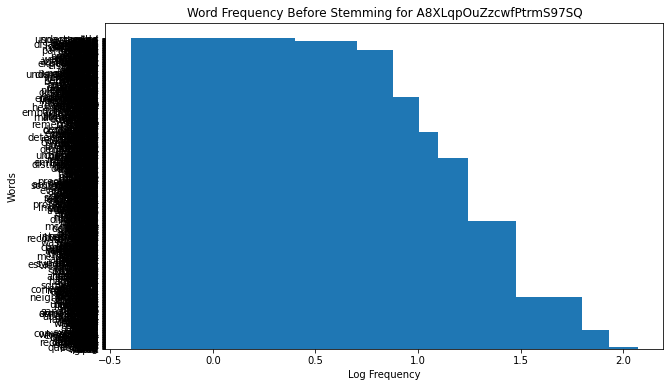

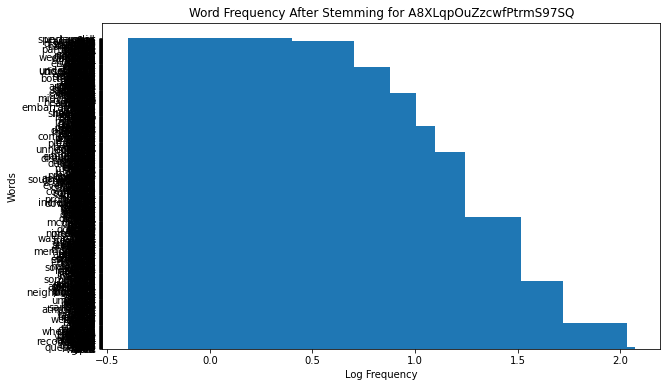

In [44]:
# Tokenize and clean reviews
stop_words = set(stopwords.words("english"))


def tokenize_reviews(reviews):
    tokens = []
    for review in reviews:
        words = word_tokenize(review.lower())  # Lowercase and tokenize
        words = [word for word in words if word.isalnum()]  # Remove punctuation
        words = [word for word in words if word not in stop_words]  # Remove stopwords
        tokens.extend(words)
    return tokens


# Get tokens before stemming
tokens_before_stemming = tokenize_reviews(b1_reviews['text'])

# Apply stemming
stemmer = PorterStemmer()
tokens_after_stemming = [stemmer.stem(token) for token in tokens_before_stemming]

# Word frequency distributions
freq_before_stemming = Counter(tokens_before_stemming)
freq_after_stemming = Counter(tokens_after_stemming)

def plot_word_frequencies(freq_dist, title):
    words, counts = zip(*freq_dist.items())
    plt.figure(figsize=(10, 6))
    plt.bar(np.log10(counts), words)
    plt.title(title)
    plt.xlabel("Log Frequency")
    plt.ylabel("Words")
    plt.show()

plot_word_frequencies(
    freq_before_stemming, f"Word Frequency Before Stemming for {b1}"
)
plot_word_frequencies(
    freq_after_stemming, f"Word Frequency After Stemming for {b1}"
)

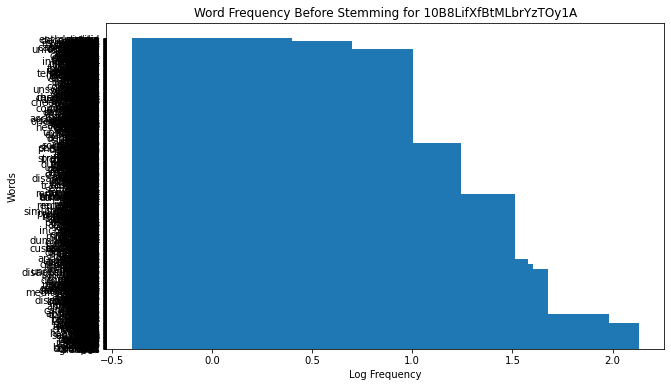

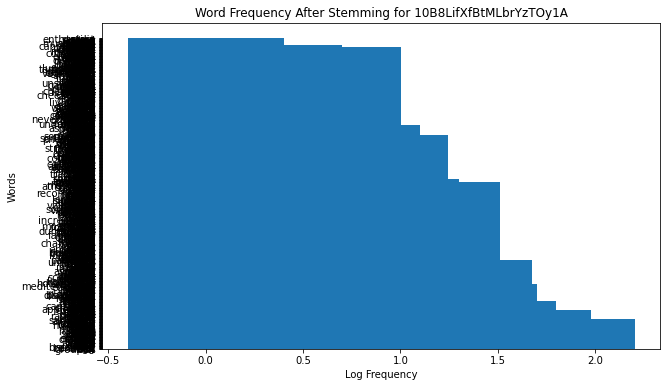

In [45]:
# Tokenize and clean reviews
stop_words = set(stopwords.words("english"))


def tokenize_reviews(reviews):
    tokens = []
    for review in reviews:
        words = word_tokenize(review.lower())  # Lowercase and tokenize
        words = [word for word in words if word.isalnum()]  # Remove punctuation
        words = [word for word in words if word not in stop_words]  # Remove stopwords
        tokens.extend(words)
    return tokens


# Get tokens before stemming
tokens_before_stemming = tokenize_reviews(b2_reviews["text"])

# Apply stemming
stemmer = PorterStemmer()
tokens_after_stemming = [stemmer.stem(token) for token in tokens_before_stemming]

# Word frequency distributions
freq_before_stemming = Counter(tokens_before_stemming)
freq_after_stemming = Counter(tokens_after_stemming)


def plot_word_frequencies(freq_dist, title):
    words, counts = zip(*freq_dist.items())
    plt.figure(figsize=(10, 6))
    plt.bar(np.log10(counts), words)
    plt.title(title)
    plt.xlabel("Log Frequency")
    plt.ylabel("Words")
    plt.show()


plot_word_frequencies(freq_before_stemming, f"Word Frequency Before Stemming for {b2}")
plot_word_frequencies(freq_after_stemming, f"Word Frequency After Stemming for {b2}")